In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
dataset= pd.read_csv ('insurance.csv')

In [12]:

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [15]:
dataset.shape

(1338, 7)

In [16]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
dataset.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [21]:
dataset ['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [22]:
dataset ['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
#data cleaning

In [26]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
sns.set(style="darkgrid")

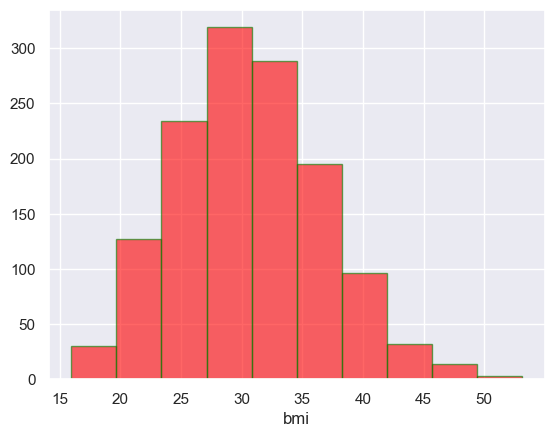

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

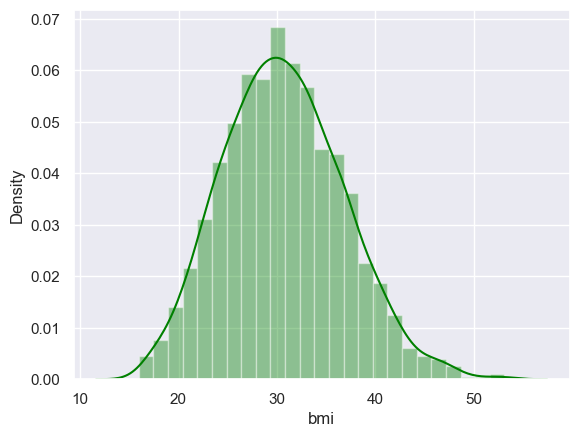

In [34]:
plt.hist(dataset['bmi'], color= 'red', edgecolor = 'green', alpha = 0.6)
plt.xlabel('bmi')
plt.show()

sns.distplot(dataset['bmi'], color= 'green')

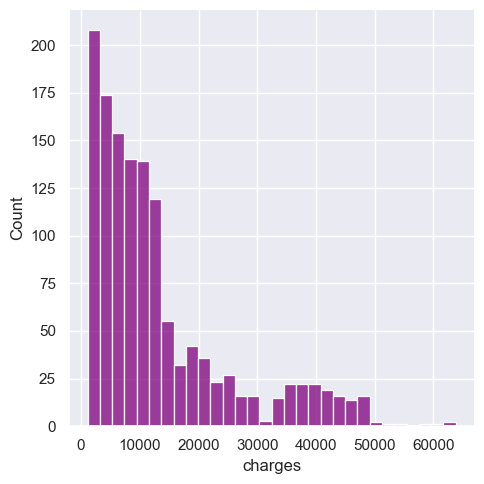

In [36]:
sns.displot(dataset['charges'], color="purple");

In [37]:
print("skewness: %f" %data['charges'].skew())
print("kurtosis: %f" %data['charges'].kurt())

skewness: 1.515880
kurtosis: 1.606299


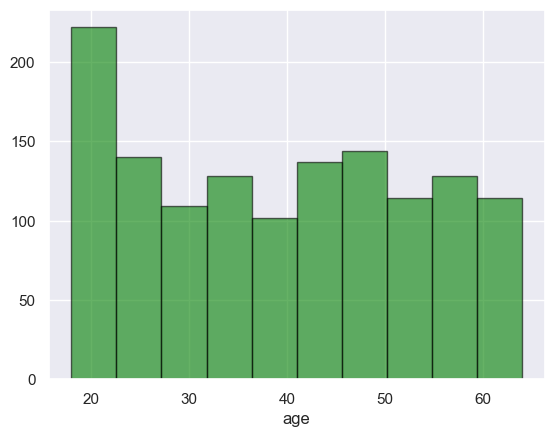

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

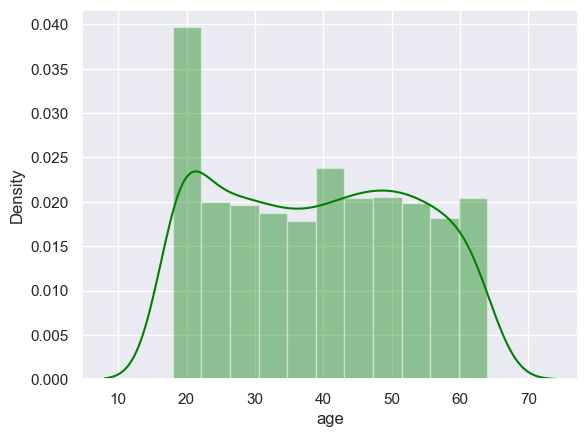

In [38]:
plt.hist(dataset['age'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('age')
plt.show()

sns.distplot(dataset['age'], color= 'green')

In [39]:
corelation = dataset.corr()

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


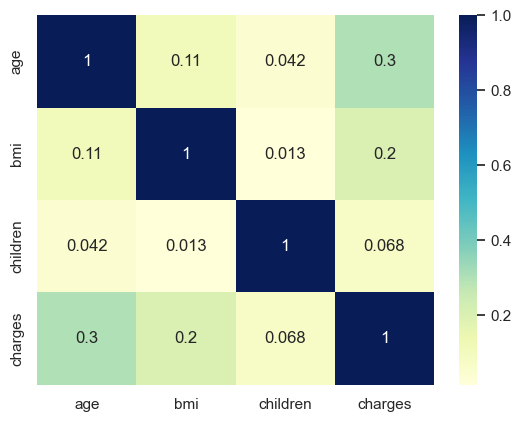

In [40]:
print(dataset.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

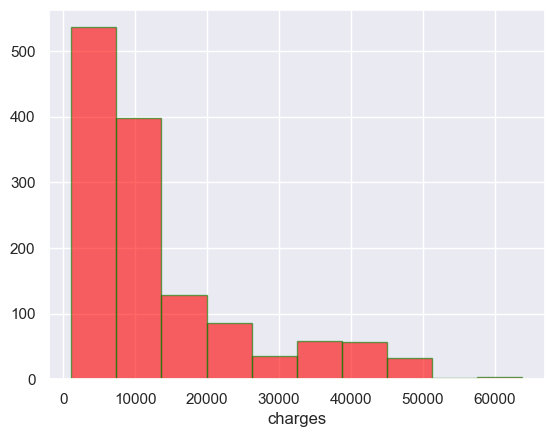

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

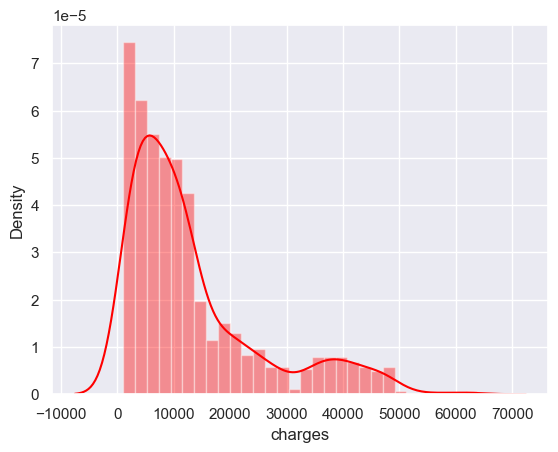

In [43]:

plt.hist(dataset['charges'], color= 'red', edgecolor = 'green', alpha = 0.6)
plt.xlabel('charges')
plt.show()

sns.distplot(dataset['charges'], color= 'red')

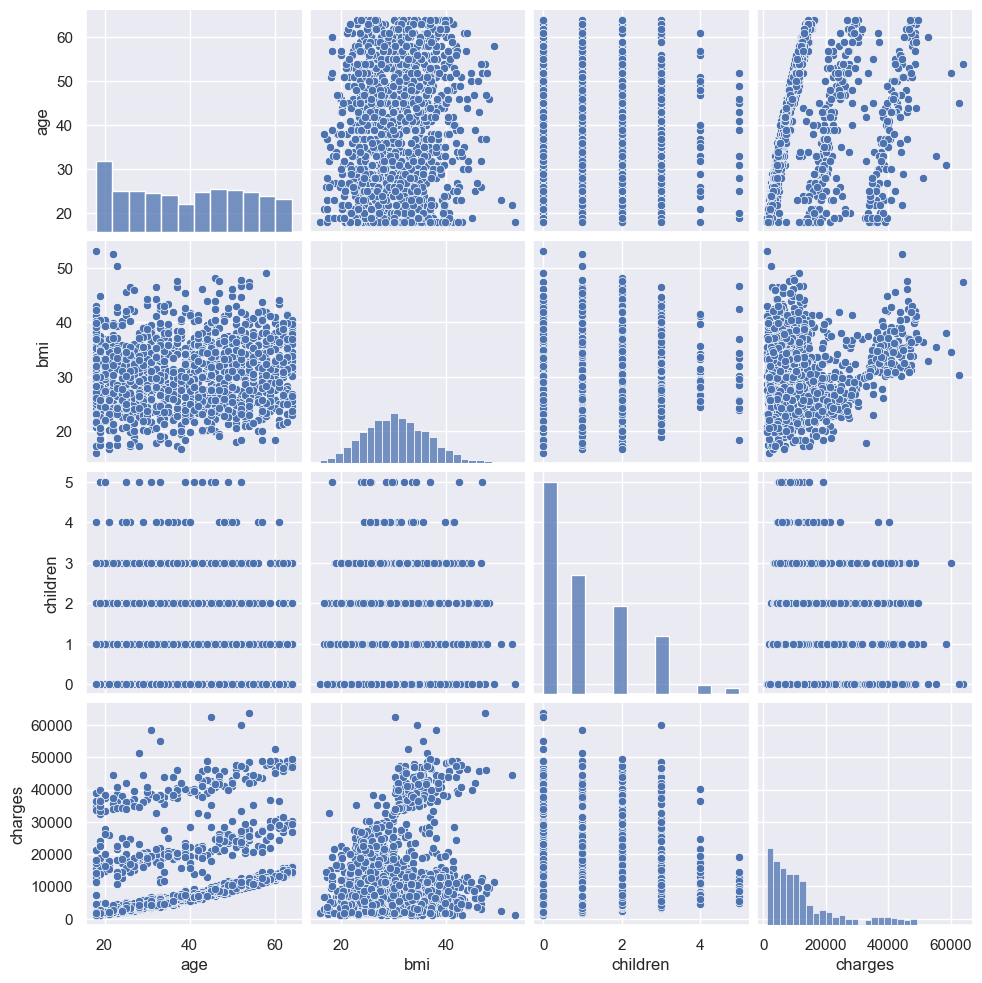

In [45]:
sns.pairplot(data)
mp.show()

In [48]:
# calculating Q1, Q3 and IQR values
Q1 = np.percentile(dataset['bmi'], 25)
Q3 = np.percentile(dataset['bmi'], 75)
IQR = Q3 - Q1

#identifying outliers and printing count
bmi_out = [x for x in dataset['bmi'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for bmi:', len(bmi_out))

Identified outliers for bmi: 9


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

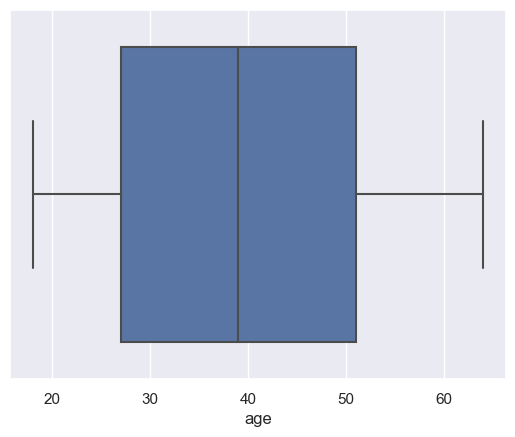

In [50]:
sns.boxplot(dataset['age'])

In [51]:
Q1 = np.percentile(dataset['age'], 25)
Q3 = np.percentile(dataset['age'], 75)
IQR = Q3 - Q1

age_out = [x for x in dataset['age'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for age:', len(age_out))

Identified outliers for age: 0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

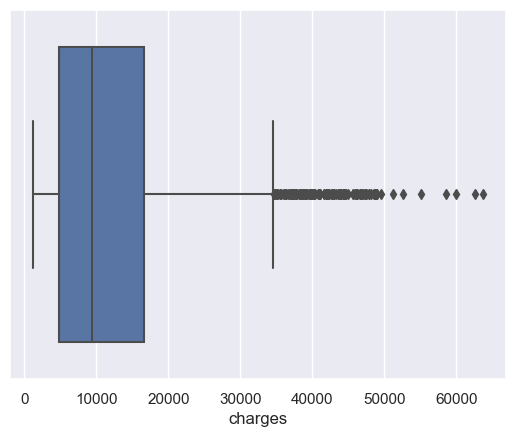

In [54]:
sns.boxplot(dataset['charges'])

In [55]:
Q1 = np.percentile(dataset['charges'], 25)
Q3 = np.percentile(dataset['charges'], 75)
IQR = Q3 - Q1

charges_out = [x for x in dataset['charges'] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
print('Identified outliers for charges:', len(charges_out))

Identified outliers for charges: 139


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

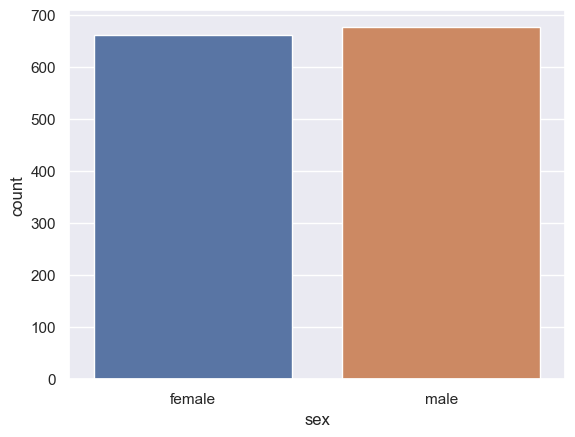

In [56]:
sns.countplot(dataset['sex'])

<AxesSubplot:xlabel='sex', ylabel='charges'>

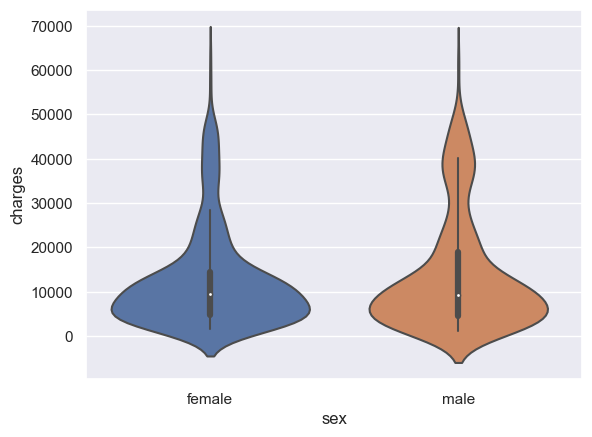

In [57]:
sns.violinplot(y='charges', x='sex', data=dataset, split=True)

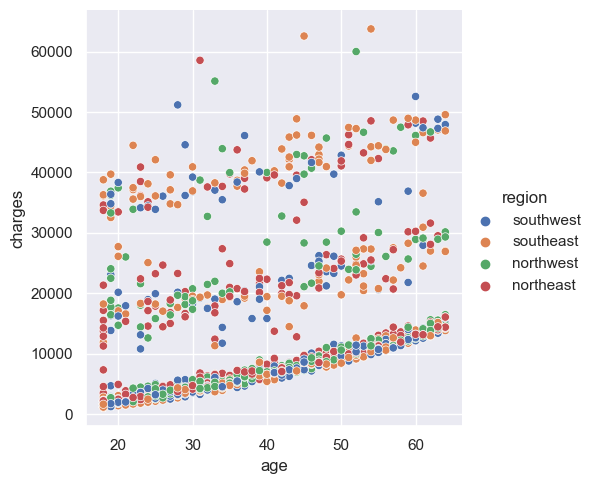

In [58]:
sns.relplot(x='age', y='charges', hue='region',data=dataset)
plt.show()

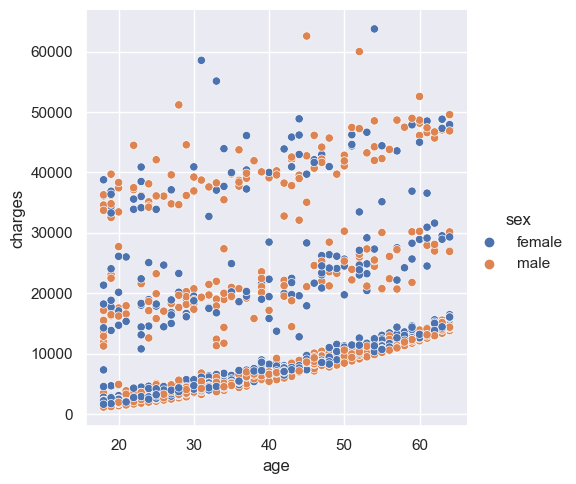

In [59]:
sns.relplot(x='age', y='charges', hue='sex',data=dataset)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

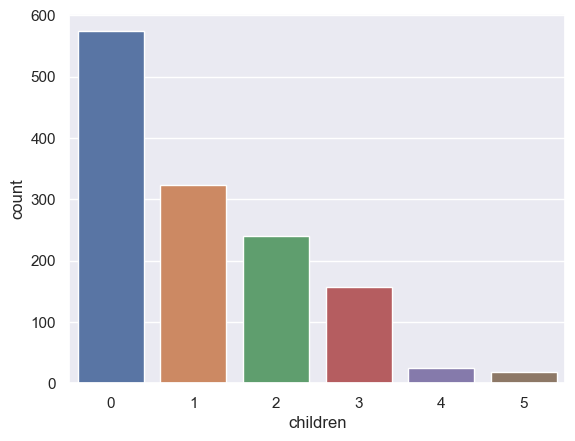

In [60]:
sns.countplot(dataset['children'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

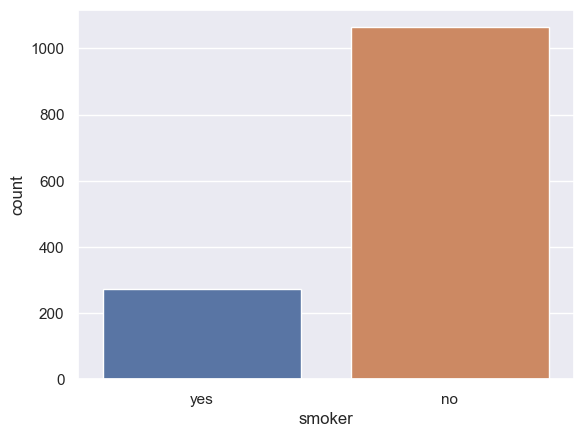

In [61]:
sns.countplot(dataset['smoker'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points

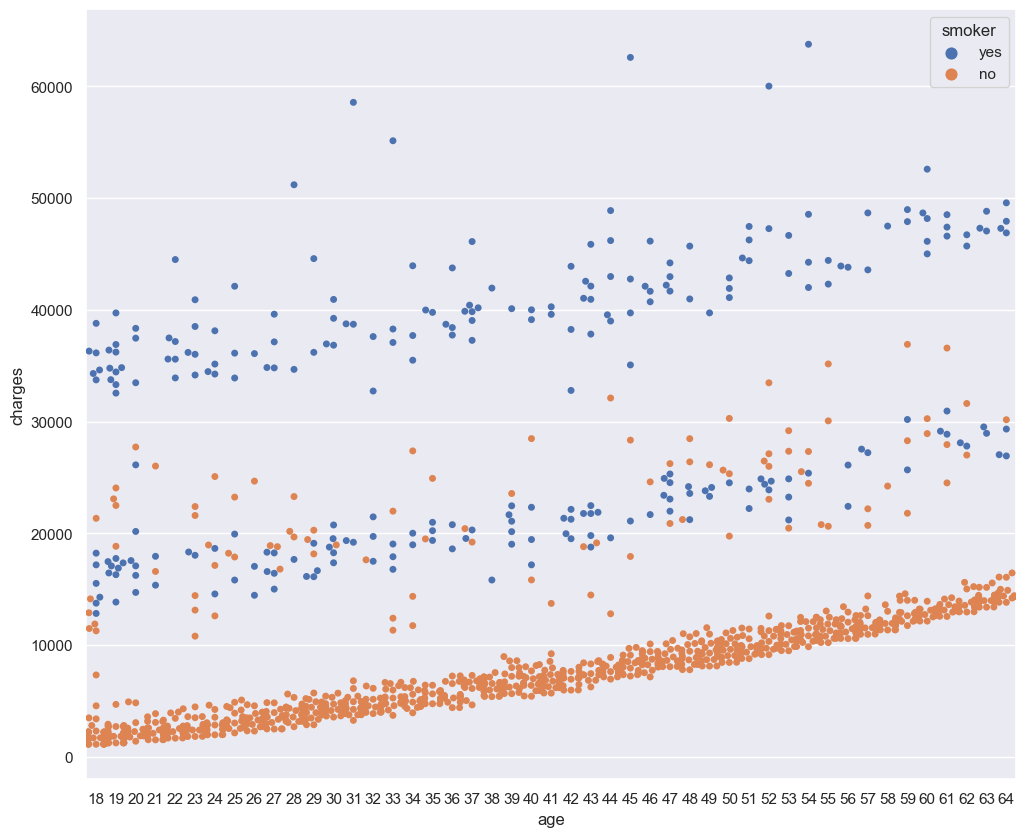

In [62]:
plt.figure(figsize=(12,10))
sns.swarmplot(y='charges',x='age',hue='smoker',data=dataset)
plt.show()


In [65]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points c

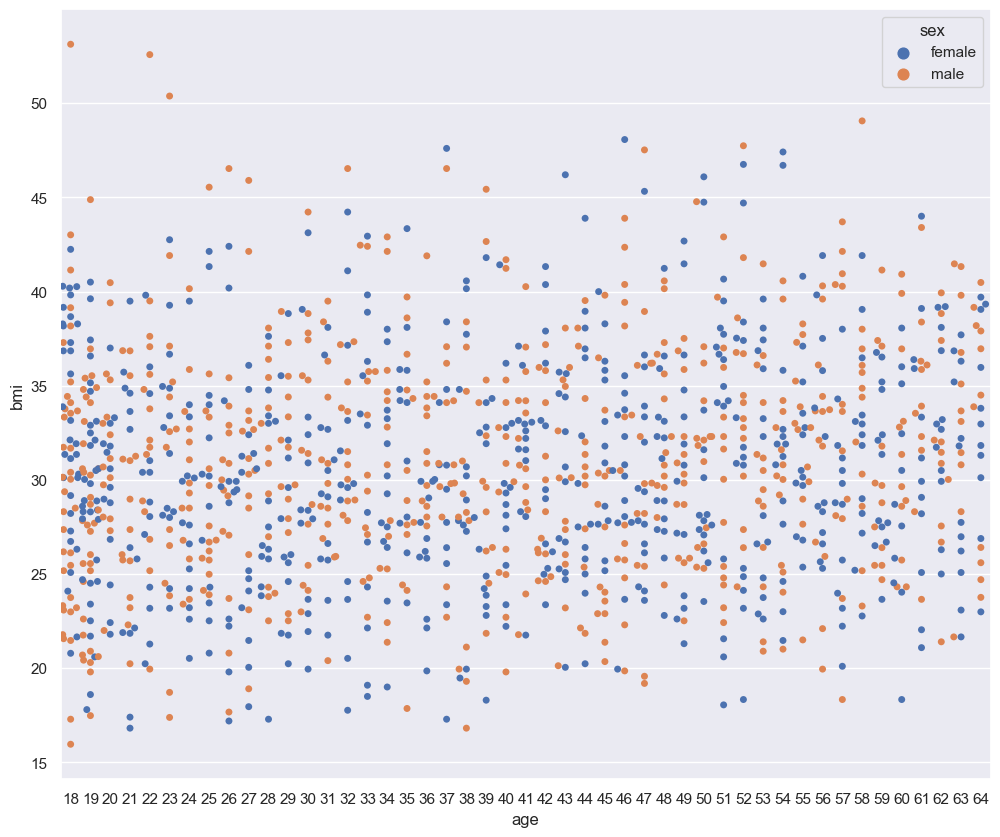

In [66]:
plt.figure(figsize=(12,10))
sns.swarmplot(y='bmi',x='age',hue='sex',data=dataset)
plt.show()

In [68]:
x =  dataset[['age', 'children']]

In [69]:
y = dataset['charges']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [71]:
model = LinearRegression()

In [72]:
model.fit(x_train, y_train)

LinearRegression()

In [73]:
print(model.coef_)

[259.40017942 500.41573446]


In [74]:
print(model.intercept_)

2480.0391708839034


In [75]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
age,259.400179
children,500.415734


In [76]:
predictions = model.predict(x_test)

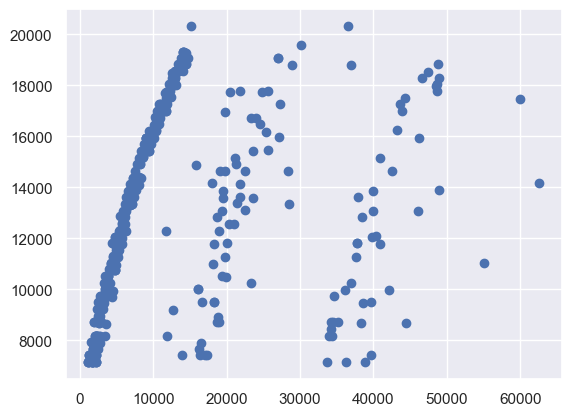

In [77]:
mp.scatter(y_test, predictions)
plt.show()